<a href="https://colab.research.google.com/github/Preeti-1234/Data-Analytics/blob/main/DATA_MINING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IBM HR Analytics Employee Attrition & Performance**

# APPLYING DATA MINING IMPLEMENTATION PROCESS

# BUSSINESS UNDERSTANDING -

# OBJECTIVE - *Utilize IBM HR Analytics for Employee Attrition and Performance to proactively identify and address factors that may lead to the departure of valuable employees, in order to retain top talent and maintain business continuity.*



In [1]:
#IMPORTING DATASET
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


**Preparation**

Set the environment

Load the data successfully

Conduct preliminary data analysis

In [2]:
import pandas as pd
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

# EXPLORATORY DATA ANALYSIS 

***Data Understanding ***

is an important step in data analysis because it helps to identify potential issues or opportunities that may need further investigation.

# Data about Data
#Identify Ordinal and Nominal variables

In [5]:
df.info()
#data.info() input and output, showing list of column, number of its non-null values, and its type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are several cols which are non numeric

The dataset has 1470 rows and 35 columns

35 columns comprise of 26 numerical variables and 9 categorical variables

In [6]:
#Check for null values 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values


In [7]:
#Unique values in evry col
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

The following columns are "no use" variables; they does not add values to the predictive model 
EmployeeNumber (1470 unique values)
EmployeeCount (only 1 unique value)
Over18 (only 1 unique value)
StandardHours (only 1 unique value)

In [8]:
df.drop(columns=['EmployeeNumber','EmployeeCount','Over18','StandardHours'],axis=1, inplace = True)

**Data Preparation **

Handling of Categorial variables 


In [9]:
# identify categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == "object"]
print("names of categorical columns: ", categorical_cols)

names of categorical columns:  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [10]:
df[categorical_cols].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

Ordinal variables: categorical variables with a clear ordering in the values

Nominal variables: categorical variables without an ordering in the values 


Attrition (2 values) needs binary encoding to encode categorical values ('Yes'/'No') to numerical values

BusinessTravel (3 values) is an ordinal variable and needs ordinal encoding

Department (3 values) is a nominal varialbe and needs one-hot encoding

EducationField (6 values): is a nominal variable and needs other categorical encoding

Gender (2 values): needs binary encoding

JobRole (9 values): is a nominal variable and needs other categorical encoding

MaritalStatus (3 values) is a nominal variable and needs one-hot encoding

OverTime (2 values): needs binary encoding

In [11]:
#Binary encoding
def copy_df(df):
  
    df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})
    df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
    df['OverTime'] = df['OverTime'].replace({'No': 0, 'Yes': 1})
    
    return df
df2 = copy_df(df)

In [12]:
#ordinal encoding
def copy_df(df2):

    #ordinal encoding of an ordinal categorical variable with three values to 2s, 1s and 0s
    df2['BusinessTravel'] = df2['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
    
    return df2
df3 = copy_df(df2)

In [13]:
from sklearn.preprocessing import OneHotEncoder
# one hot encoding
enc = OneHotEncoder(sparse=False)
color_onehot = enc.fit_transform(df3[['Department']])
#to print the encoded features for train data
pd.DataFrame(color_onehot, columns=list(enc.categories_[0]))
# tranform encoding for test data
test_onehot = enc.transform(df3[['Department']])
#to print the encoded features for train data
pd.DataFrame(test_onehot, columns=list(enc.categories_[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Human Resources,Research & Development,Sales
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1465,0.0,1.0,0.0
1466,0.0,1.0,0.0
1467,0.0,1.0,0.0
1468,0.0,0.0,1.0


In [14]:
from sklearn.preprocessing import OneHotEncoder
# one hot encoding
enc = OneHotEncoder(sparse=False)
color_onehot = enc.fit_transform(df3[['EducationField']])
#to print the encoded features for train data
pd.DataFrame(color_onehot, columns=list(enc.categories_[0]))
# tranform encoding for test data
test_onehot = enc.transform(df3[['EducationField']])
#to print the encoded features for train data
pd.DataFrame(test_onehot, columns=list(enc.categories_[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
1465,0.0,0.0,0.0,1.0,0.0,0.0
1466,0.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,1.0,0.0,0.0,0.0,0.0
1468,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
from sklearn.preprocessing import OneHotEncoder
# one hot encoding
enc = OneHotEncoder(sparse=False)
color_onehot = enc.fit_transform(df3[['JobRole']])
#to print the encoded features for train data
pd.DataFrame(color_onehot, columns=list(enc.categories_[0]))
# tranform encoding for test data
test_onehot = enc.transform(df3[['JobRole']])
#to print the encoded features for train data
pd.DataFrame(test_onehot, columns=list(enc.categories_[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1465,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1466,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1467,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
from sklearn.preprocessing import OneHotEncoder
# one hot encoding
enc = OneHotEncoder(sparse=False)
color_onehot = enc.fit_transform(df3[['MaritalStatus']])
#to print the encoded features for train data
pd.DataFrame(color_onehot, columns=list(enc.categories_[0]))
# tranform encoding for test data
test_onehot = enc.transform(df3[['MaritalStatus']])
#to print the encoded features for train data
pd.DataFrame(test_onehot, columns=list(enc.categories_[0]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Divorced,Married,Single
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1465,0.0,1.0,0.0
1466,0.0,1.0,0.0
1467,0.0,1.0,0.0
1468,0.0,1.0,0.0


In [17]:

df3 =pd.get_dummies(df3, columns=['Department','EducationField','JobRole','MaritalStatus'])


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   BusinessTravel                     1470 non-null   int64
 3   DailyRate                          1470 non-null   int64
 4   DistanceFromHome                   1470 non-null   int64
 5   Education                          1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   Gender                             1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

Now there are no non numeric cols


In [19]:
df3.describe()
#Summary of statistics about all the cols

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,9.192517,2.912925,2.721769,0.600000,65.891156,2.729932,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728
std,9.135373,0.367863,0.532170,403.509100,8.106864,1.024165,1.093082,0.490065,20.329428,0.711561,...,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530
min,18.000000,0.000000,0.000000,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,1.000000,802.000000,7.000000,3.000000,3.000000,1.000000,66.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1.000000,1157.000000,14.000000,4.000000,4.000000,1.000000,83.750000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,2.000000,1499.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Data Visualizations**

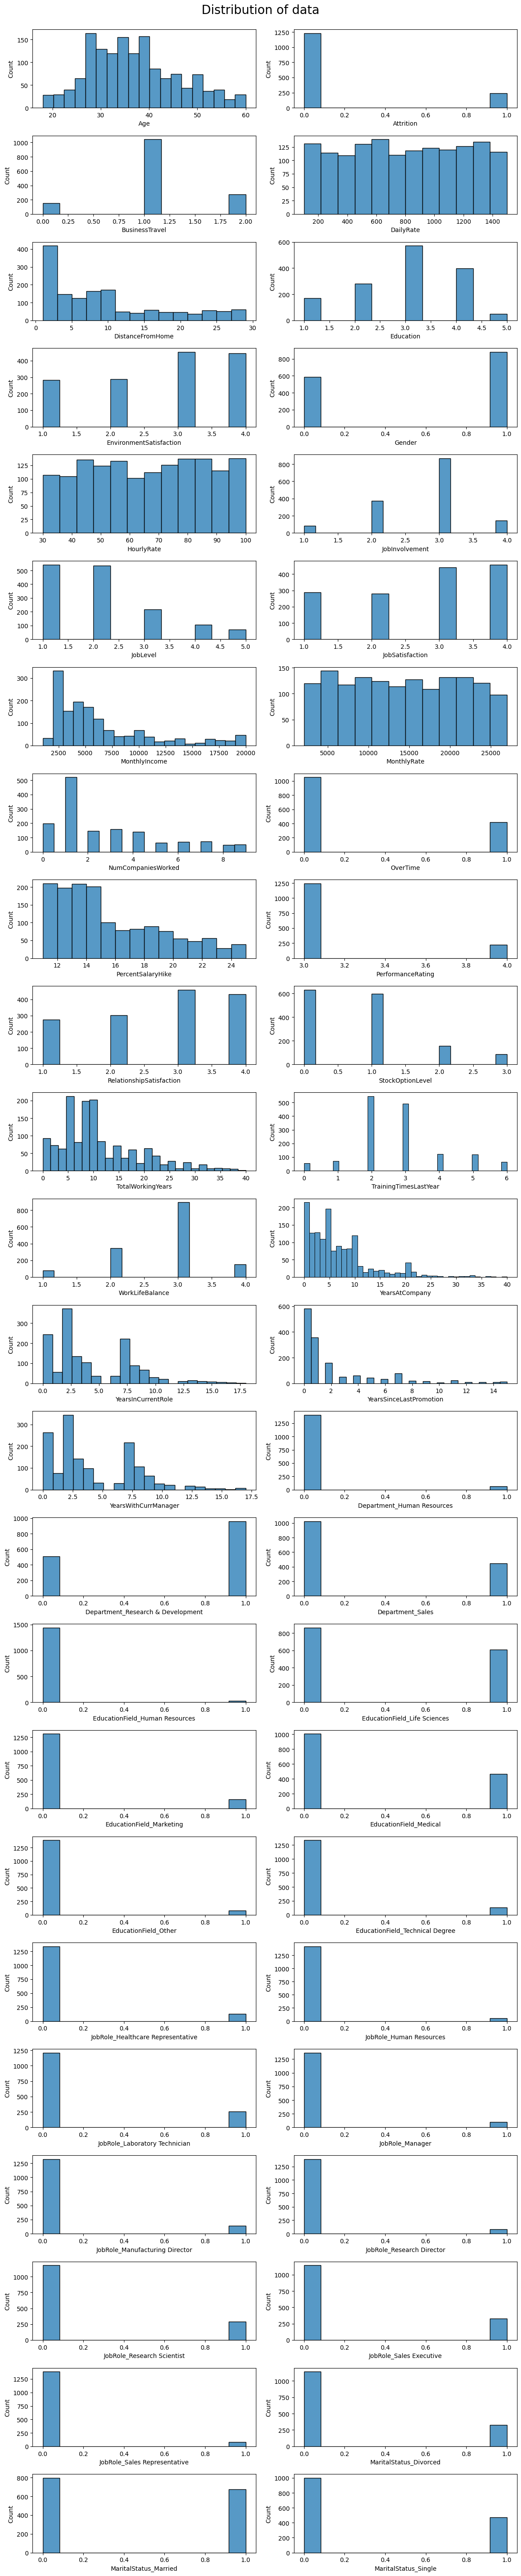

In [20]:
#visualizations
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ncols = 2
nrows = np.ceil(len(df3.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(df3.columns, axs.flatten()):
    sns.histplot(df3, x=c, ax=ax)
fig.suptitle('Distribution of data', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

<Axes: xlabel='Age', ylabel='Count'>

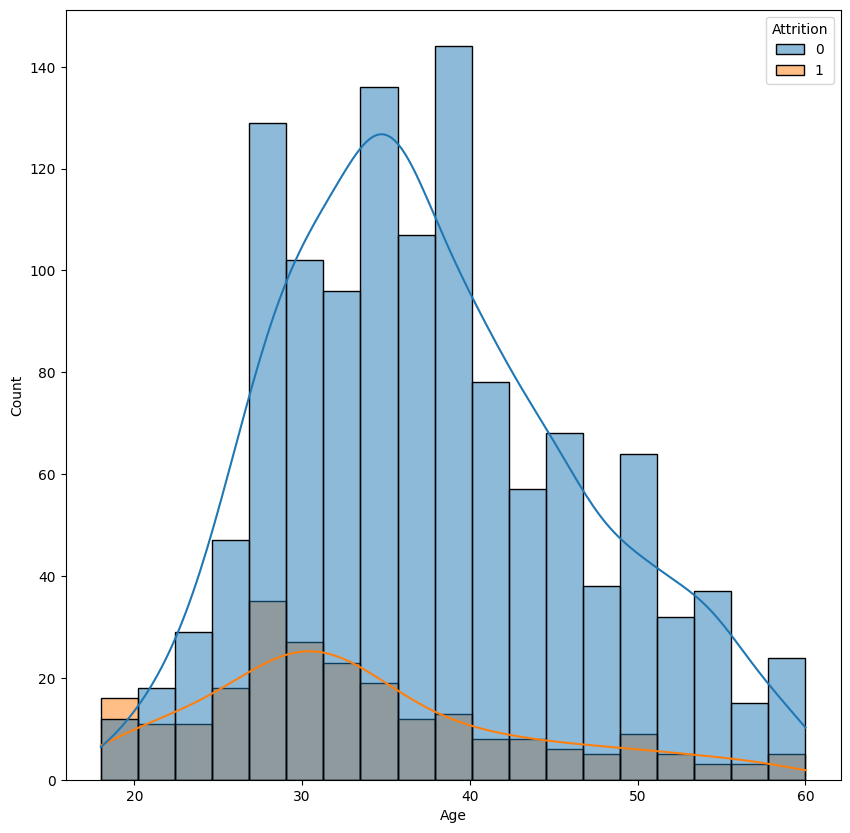

In [21]:
# Understnading with respective to target variable
plt.figure(figsize = (10, 10))
sns.histplot(x = 'Age', hue = 'Attrition', data = df3, kde=True )

The majority of employee are between 28 - 36 years old, while the range of age are 18 - 60 the Company seems to be highly depended on segment of employees younger than 40 years old.

<Axes: xlabel='BusinessTravel', ylabel='count'>

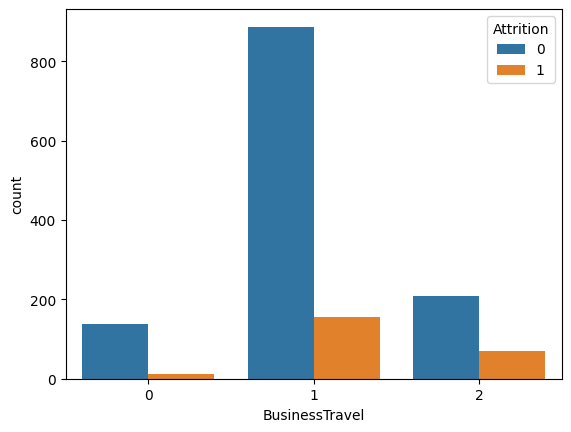

In [22]:
sns.countplot(data=df, x='BusinessTravel', hue="Attrition")

'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2
One's who travel rarely have the highest attrition rate
 

<Axes: xlabel='count', ylabel='JobRole'>

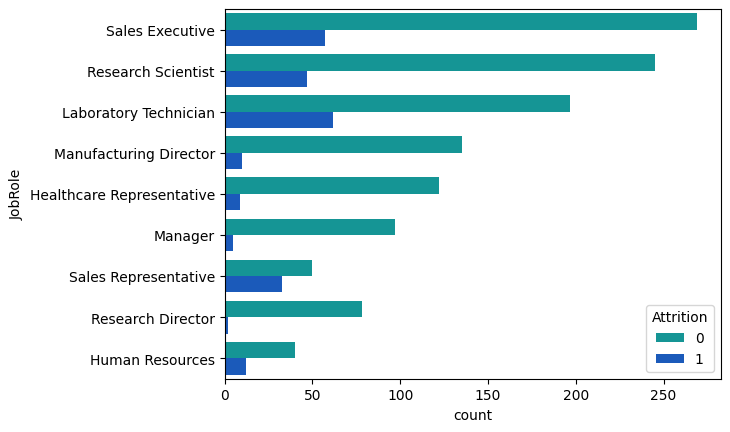

In [23]:
sns.countplot(y= 'JobRole' ,data = df,palette='winter_r'  ,hue ='Attrition')

we can see that ‘sales executive’, ‘sales representative’, and ‘lab technician’ are more likely to leave compared to other roles.

<Axes: xlabel='count', ylabel='Department'>

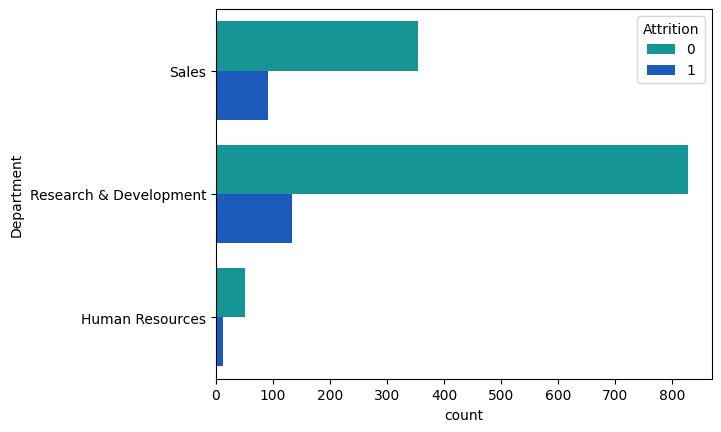

In [24]:
sns.countplot(y= 'Department' ,data = df,palette='winter_r'  ,hue ='Attrition')

R&D department has highest attrition rate.

<Axes: xlabel='count', ylabel='MaritalStatus'>

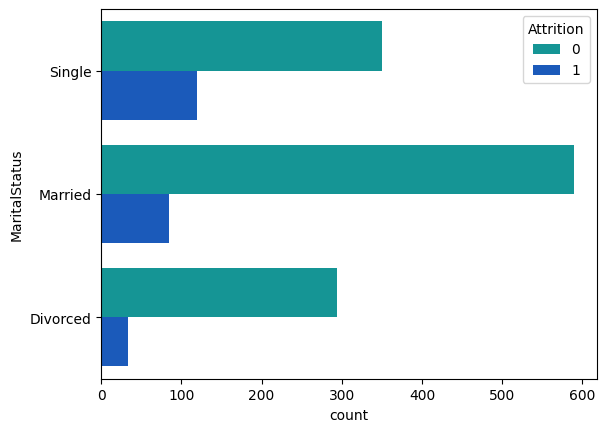

In [25]:
sns.countplot(y= 'MaritalStatus' ,data = df,palette='winter_r'  ,hue ='Attrition')

<Axes: xlabel='count', ylabel='WorkLifeBalance'>

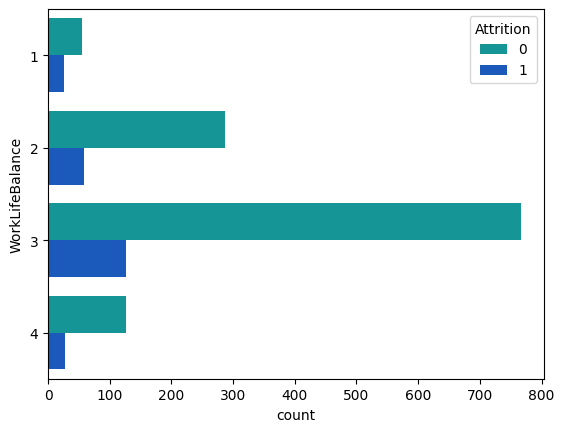

In [26]:
sns.countplot(y= 'WorkLifeBalance' ,data = df,palette='winter_r'  ,hue ='Attrition')

Those having a worklife balnce score of 4 out of 5 has highest atrrtion.


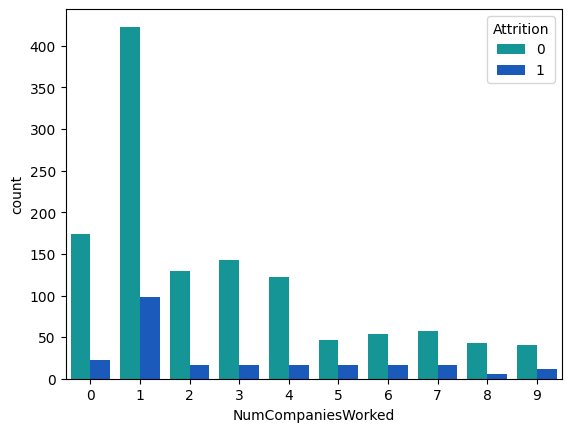

In [27]:
sns.countplot(x= 'NumCompaniesWorked' ,data =df ,palette='winter_r',hue='Attrition')

plt.show()


Employees with 1 year experience has the highest percentage to leave

<ipython-input-28-1b14cc6d7efd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")


<Axes: >

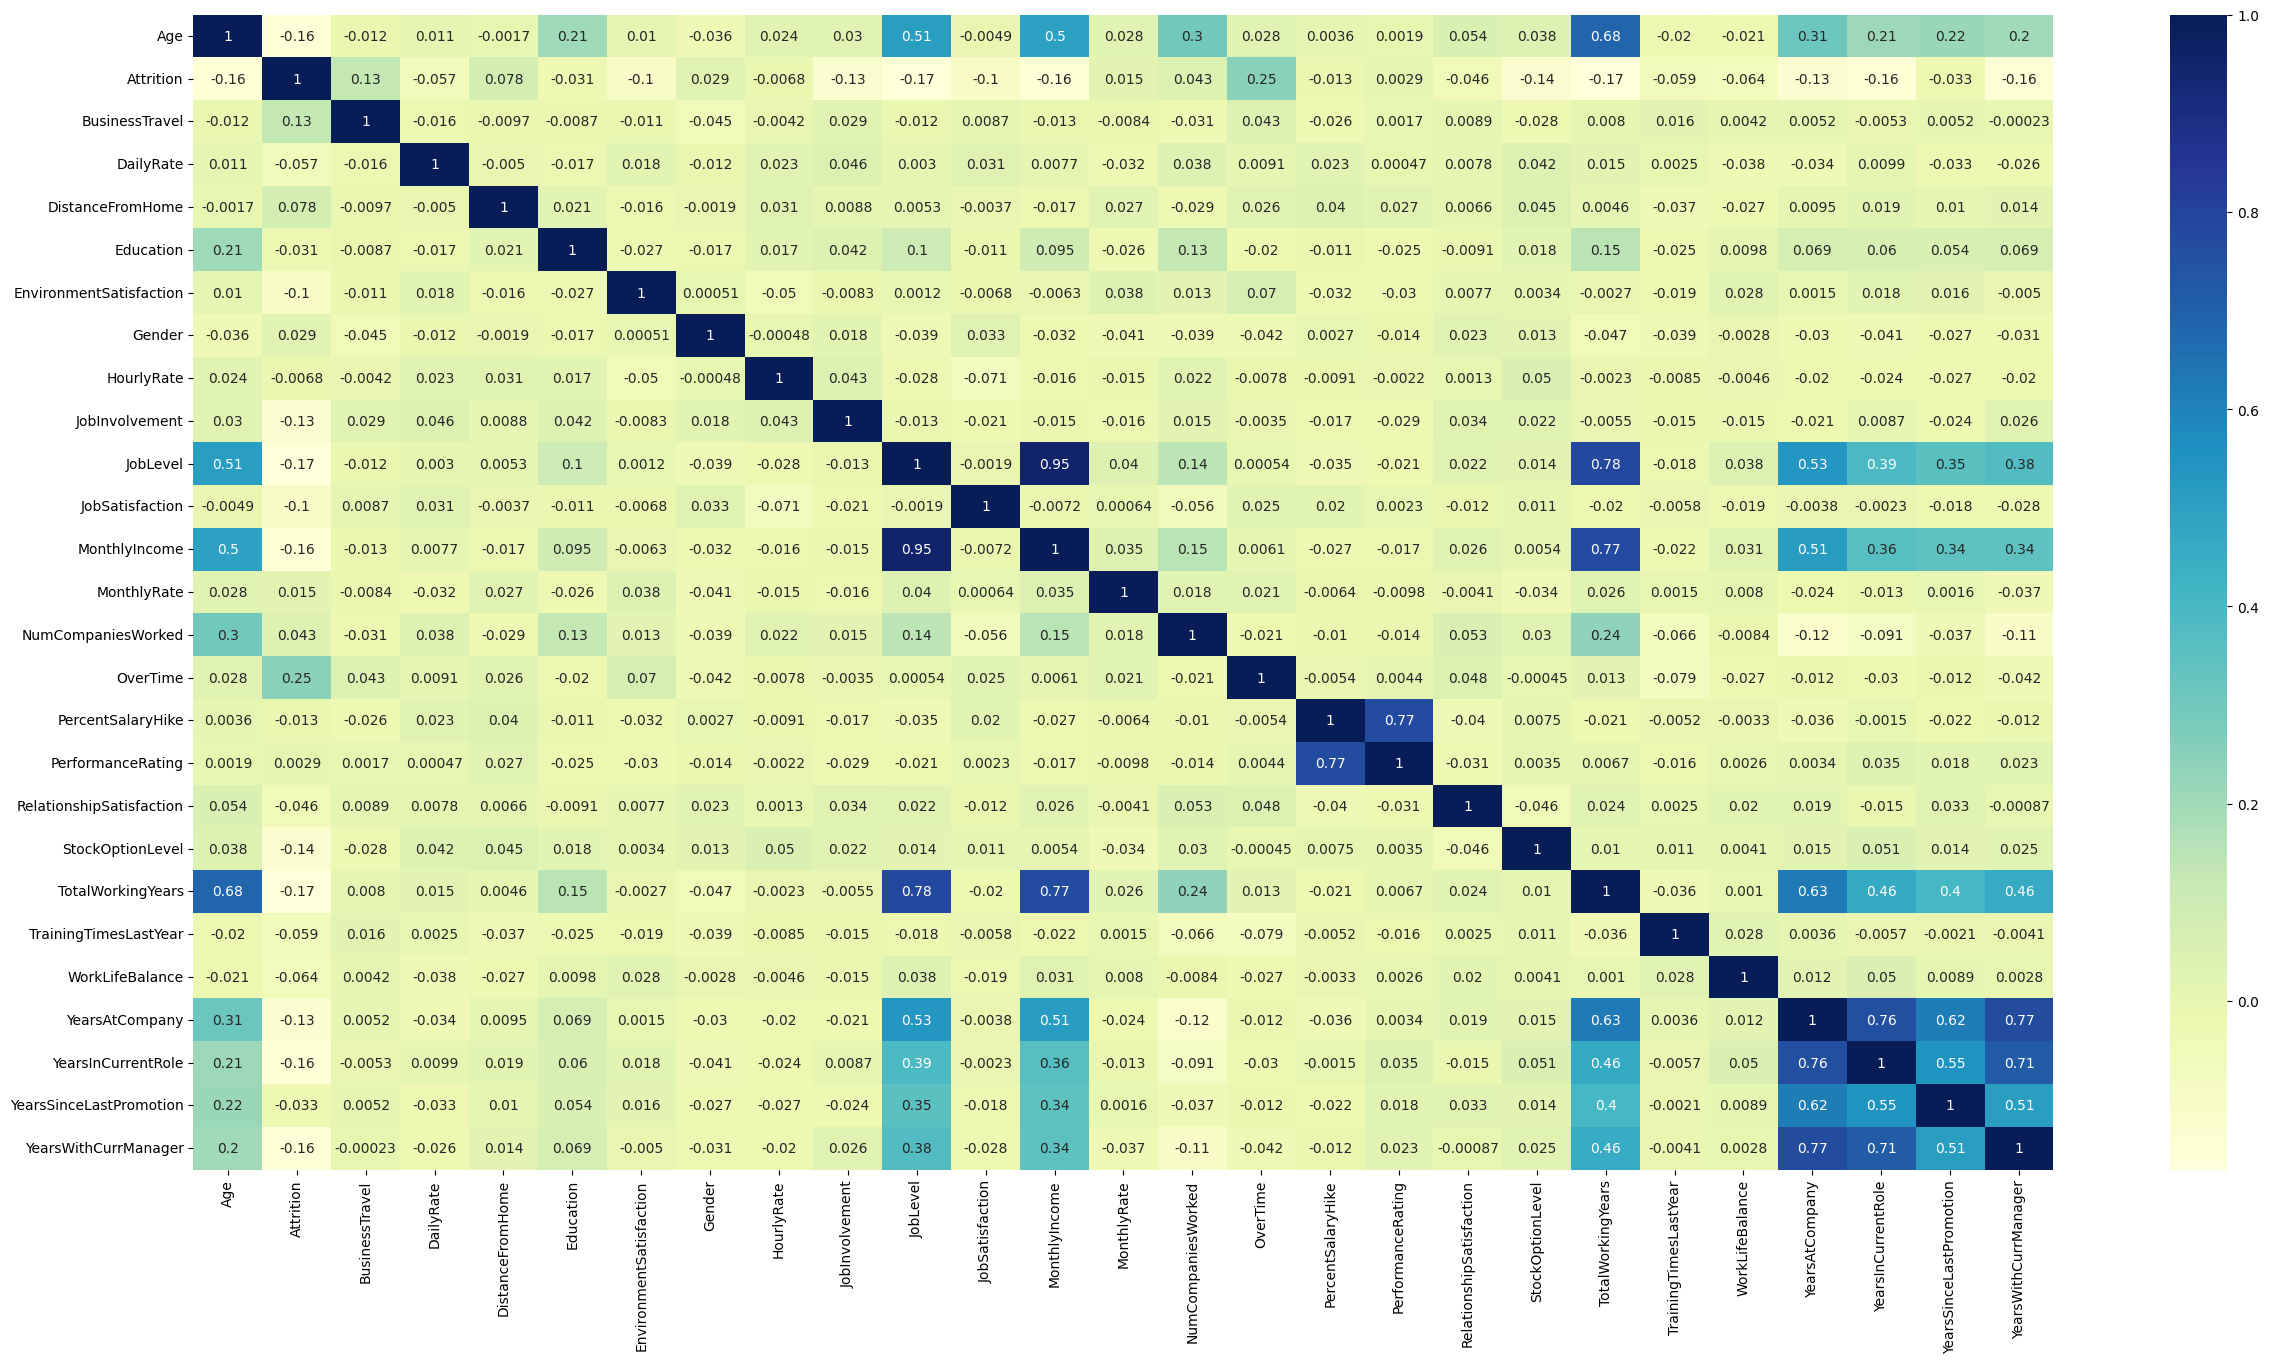

In [28]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")

Business Travel,Distance from home ,Gender, Monthy Rate ,Numberof comapines worked,Over time ,Performance Rating have positive correlation with Atrrition.

# MODEL FITTING

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [30]:
y= df3['Attrition'] 
x= df3.drop(['Attrition'], axis=1)
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [31]:
modelLogistic = LogisticRegression()
modelLogistic.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred= modelLogistic.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
ConfusionMatrix = confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)

[[248   0]
 [ 46   0]]


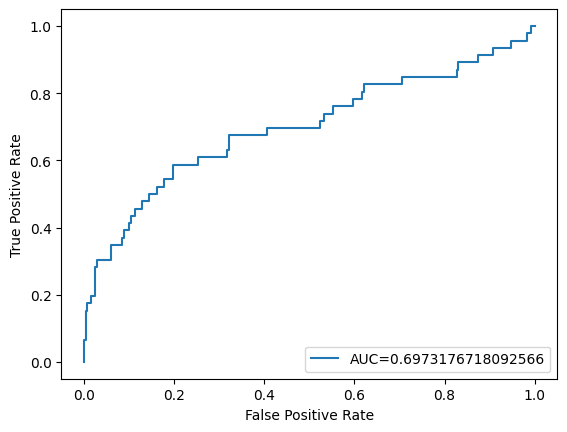

In [34]:
from sklearn import metrics
y_pred_proba = modelLogistic.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()